### Task
**Data Loading and Cleaning:**

Load the dataset using Pandas.
Perform basic data cleaning (handling missing values, incorrect data types, etc.).
**Exploratory Data Analysis (EDA):**

Use Pandas to summarize the key statistics of the dataset.
Identify unique values, ranges, and distribution of data.

**Visualization Tasks:**
- Species Distribution: Use a bar chart to show the distribution of penguin species.
- Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
- Island Distribution: Visualize the count of penguins on each island using a pie chart.
- Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.
- Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
- Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
- Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

**Insightful Visualizations:**
- Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.
- Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

## Exploratory Data Analysis

In [69]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [70]:
penguins.rename(columns = {'bill_length_mm': 'bill length', 'bill_depth_mm': 'bill depth', 'flipper_length_mm': 'flipper length', 'body_mass_g': 'body mass'}, inplace=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   bill length     342 non-null    float64
 3   bill depth      342 non-null    float64
 4   flipper length  342 non-null    float64
 5   body mass       342 non-null    float64
 6   sex             333 non-null    object 
 7   year            344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [71]:
# Not so musch values are missed, them might be just droped
penguins.dropna(inplace=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill length     333 non-null    float64
 3   bill depth      333 non-null    float64
 4   flipper length  333 non-null    float64
 5   body mass       333 non-null    float64
 6   sex             333 non-null    object 
 7   year            333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


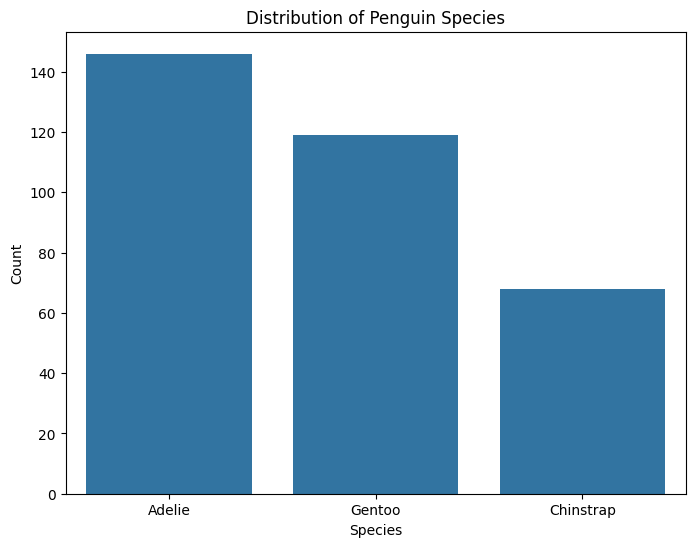

In [72]:
# the distribution of penguin species
plt1 = plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=penguins)
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

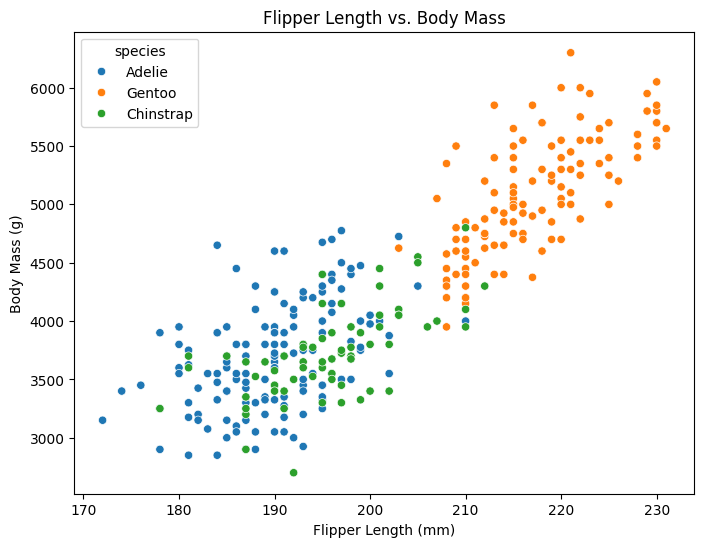

In [73]:
# Analyzing the relationship between flipper length and body mass, color-coded by species
plt2 = plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='flipper length', y='body mass', hue='species')
plt.title('Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

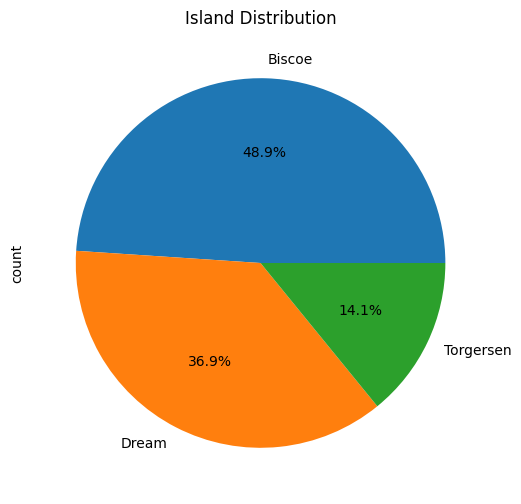

In [74]:
# Visualizing the count of penguins on each island using a pie chart.
plt3 = plt.figure(figsize=(8, 6))
penguins['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Island Distribution')
plt.show()

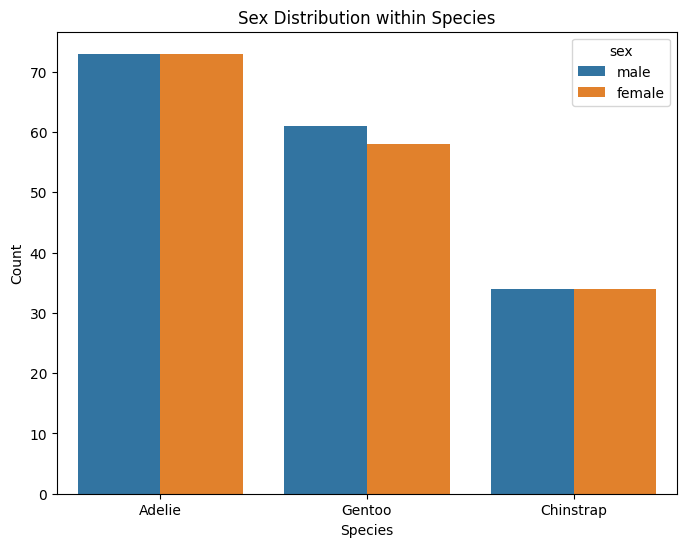

In [75]:
# Creating grouped bar charts showing the distribution of sex within each penguin species.
plt4 = plt.figure(figsize=(8, 6))
sns.countplot(data=penguins, x='species', hue='sex')
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

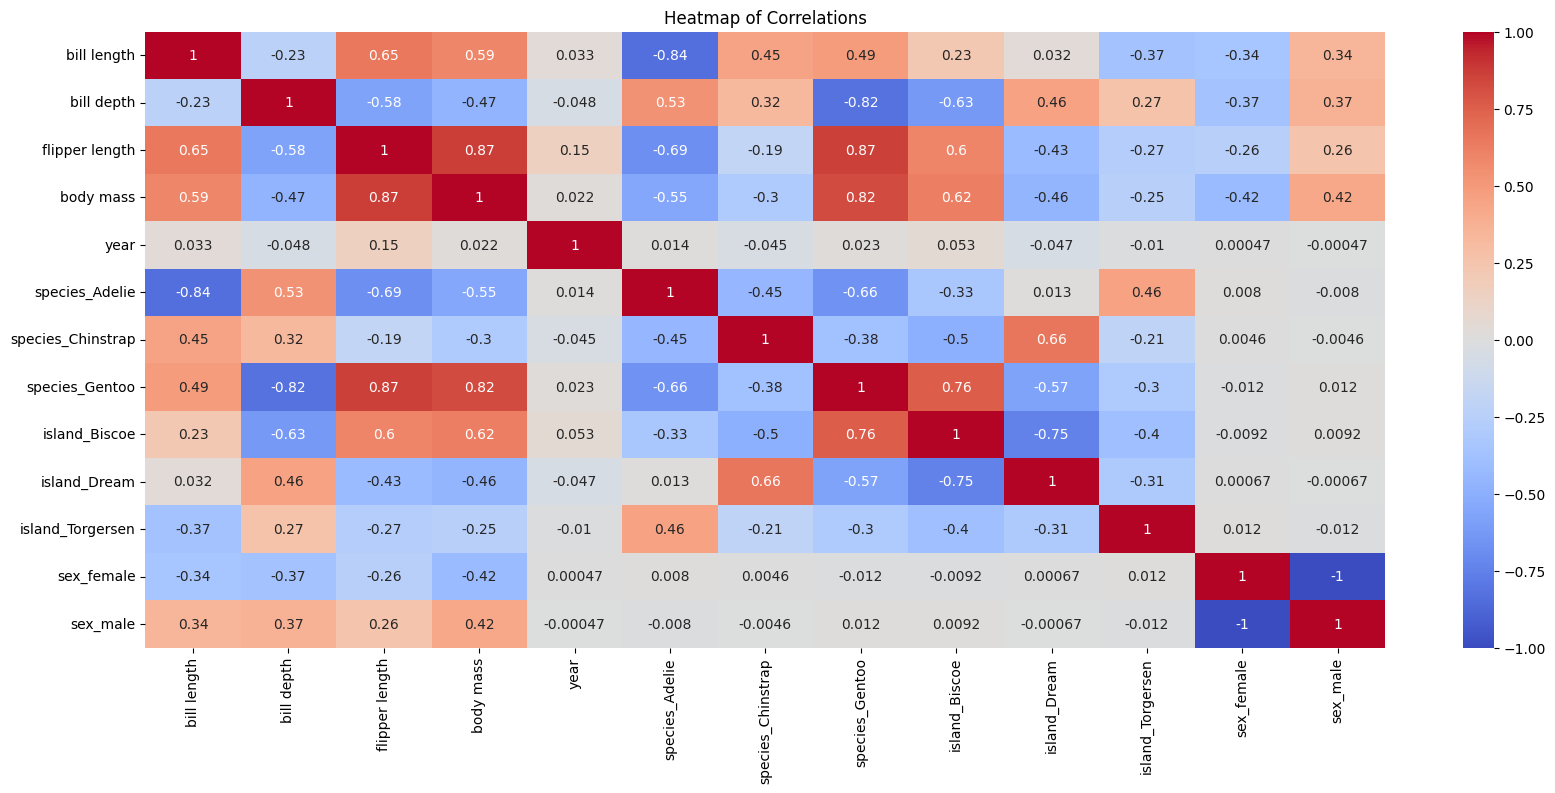

In [76]:
# Ploting a heatmap to visualize the correlations between numerical variables.
penguins_num = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])


plt5 = plt.figure(figsize=(20, 8))
sns.heatmap(penguins_num.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

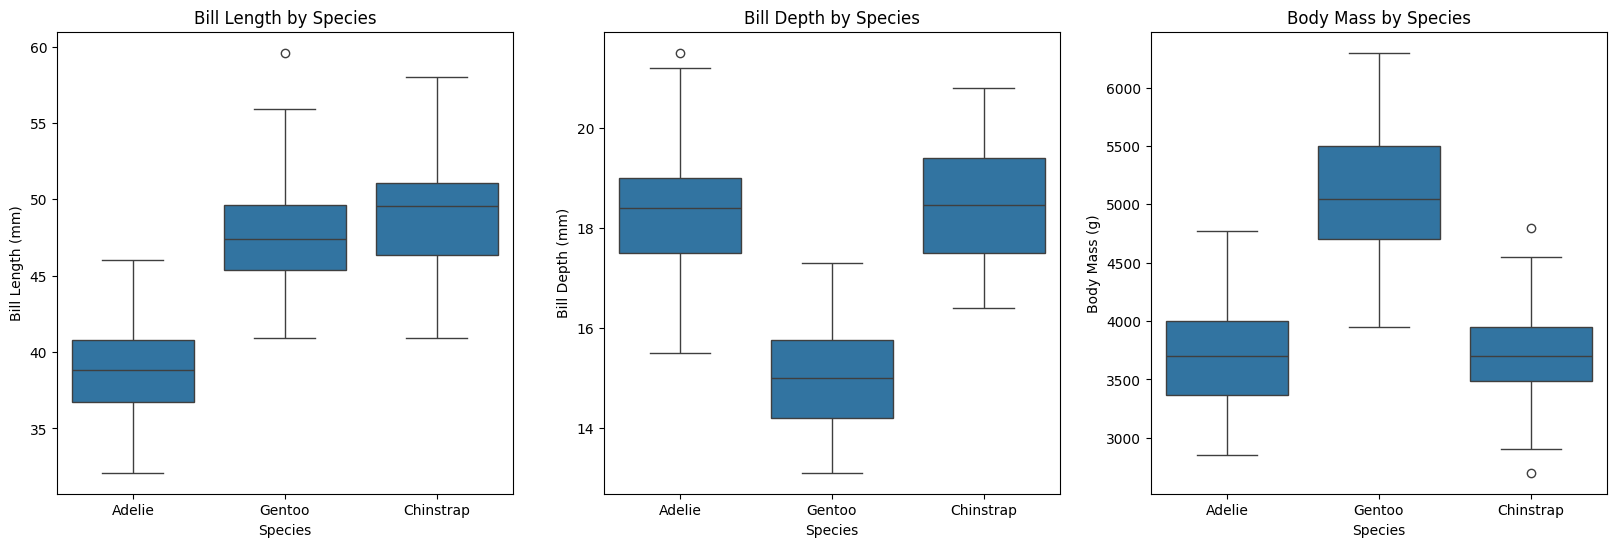

In [77]:
# Generating boxplots for flipper length, body mass, and bill measurements, segmented by species.
plt6 = plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=penguins, x='species', y='bill length')
plt.title('Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')

plt.subplot(1, 3, 2)
sns.boxplot(data=penguins, x='species', y='bill depth')
plt.title('Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')

plt.subplot(1, 3, 3)
sns.boxplot(data=penguins, x='species', y='body mass')
plt.title('Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

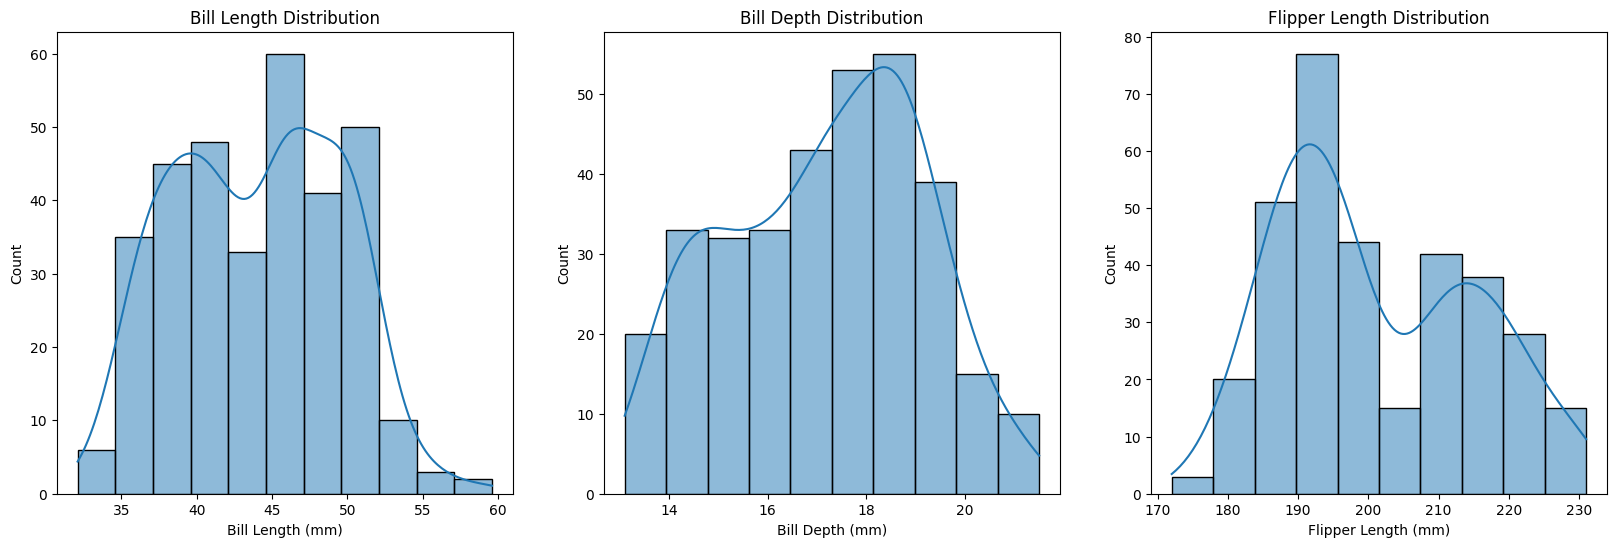

In [78]:
# Creating histograms to show the distribution of key measurements (bill length, bill depth, flipper length).
plt7 = plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.histplot(penguins['bill length'], kde=True)
plt.title('Bill Length Distribution')
plt.xlabel('Bill Length (mm)')

plt.subplot(1, 3, 2)
sns.histplot(penguins['bill depth'], kde=True)
plt.title('Bill Depth Distribution')
plt.xlabel('Bill Depth (mm)')

plt.subplot(1, 3, 3)
sns.histplot(penguins['flipper length'], kde=True)
plt.title('Flipper Length Distribution')
plt.xlabel('Flipper Length (mm)')
plt.show()

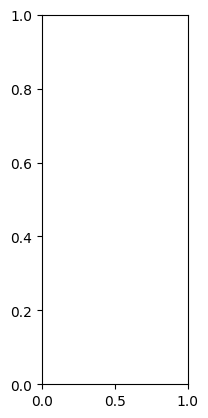

In [82]:
plt.subplot(1, 3, 1)
plt.show(plt1)


<Figure size 2000x800 with 0 Axes>

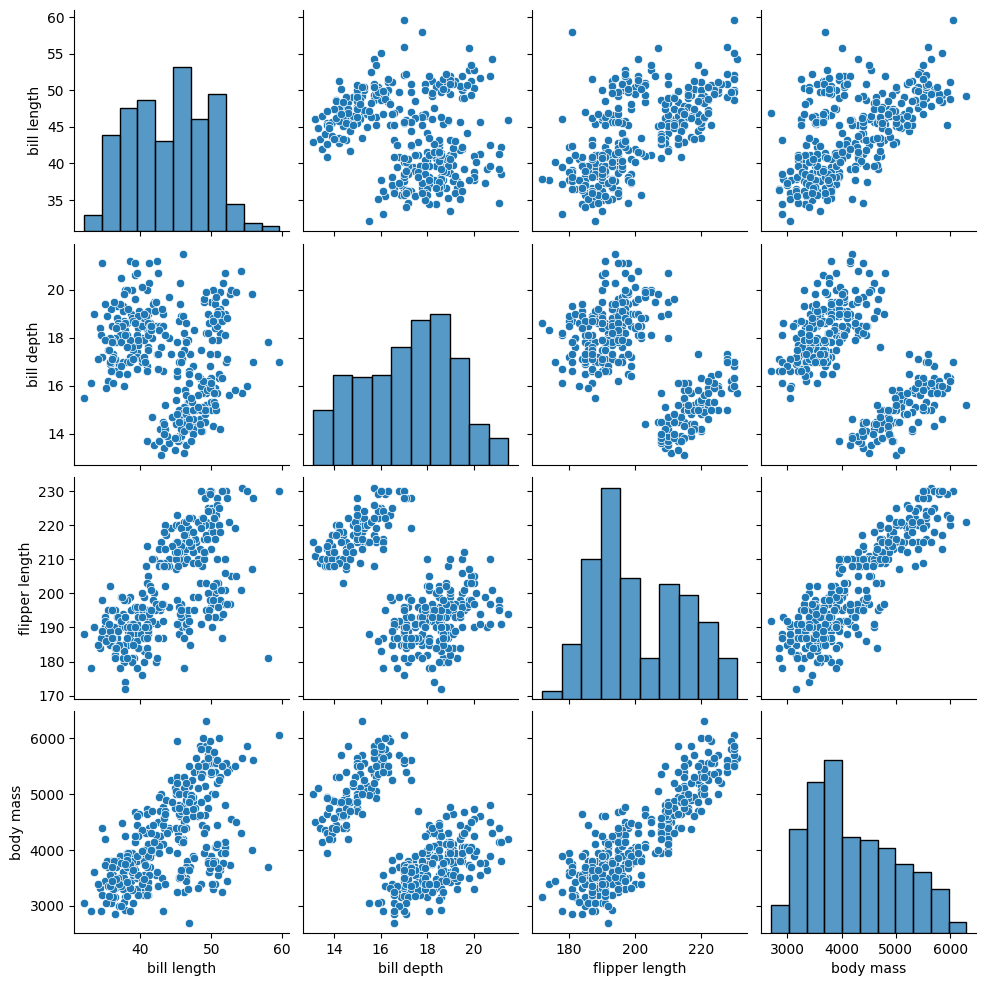

In [80]:
plt.figure(figsize=(20, 8))
sns.pairplot(penguins_num[['bill length', 'bill depth', 'flipper length', 'body mass']])
plt.show()